# SMA Assignment 1

### Part I: Find predictors of influence

#### Group Member: Abhinav Singh, Catherine Miao, Eddie Eustachon, Elaine Wang, Thomas Bruce, Qinpei Zou

In [2]:
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
import warnings
warnings.filterwarnings("ignore")

### 1. Read Data

In [43]:
df=pd.read_csv("train.csv",sep=',')

In [44]:
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,...,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,...,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,...,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,...,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,...,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,...,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


### 2. See the correlation matrix to check if we should use all variables

In [18]:
df2=df[df.columns[1:12]] 

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3
A_follower_count,1.000000,0.115834,0.815952,0.511609,0.521888,0.018456,0.094799,0.042993,0.622146,-0.153272,-0.036082
A_following_count,0.115834,1.000000,0.100696,0.058140,0.051819,0.111342,-0.083883,0.138373,0.047236,0.043642,0.097762
A_listed_count,0.815952,0.100696,1.000000,0.734589,0.747752,0.061729,0.155630,0.053975,0.705268,-0.080056,-0.038574
A_mentions_received,0.511609,0.058140,0.734589,1.000000,0.990021,0.023336,0.050100,0.026512,0.922340,-0.062407,-0.038079
A_retweets_received,0.521888,0.051819,0.747752,0.990021,1.000000,0.019130,0.043846,0.033068,0.928273,-0.065266,-0.040301
A_mentions_sent,0.018456,0.111342,0.061729,0.023336,0.019130,1.000000,0.582630,0.607040,0.032608,0.064242,0.035437
A_retweets_sent,0.094799,-0.083883,0.155630,0.050100,0.043846,0.582630,1.000000,0.379318,0.081908,-0.048761,-0.042127
A_posts,0.042993,0.138373,0.053975,0.026512,0.033068,0.607040,0.379318,1.000000,0.074683,-0.066125,-0.018347
A_network_feature_1,0.622146,0.047236,0.705268,0.922340,0.928273,0.032608,0.081908,0.074683,1.000000,-0.118138,-0.071711
A_network_feature_2,-0.153272,0.043642,-0.080056,-0.062407,-0.065266,0.064242,-0.048761,-0.066125,-0.118138,1.000000,0.520617


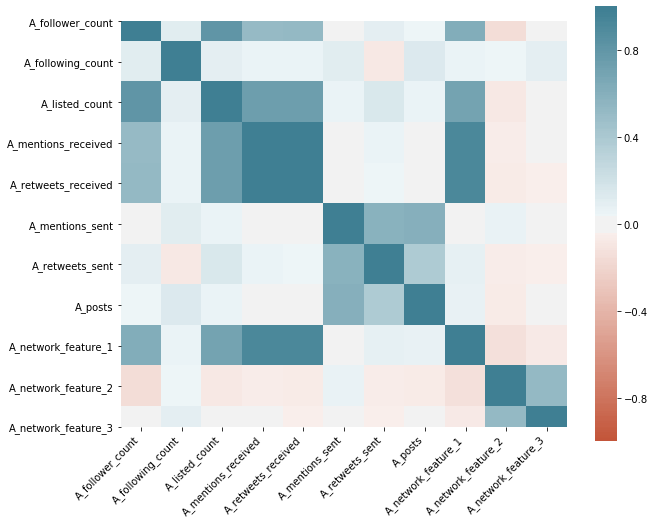

In [19]:
import seaborn as sns #from pandas.plotting import scatter_matrix
f, ax = plt.subplots(figsize=(10, 8))
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr

**From the correlation matrix, we decide to drop network_feature_1, mentions_received since cor(network_feature_1,retweets_received)=0.928, cor(mentions_received, retweets_received)=0.99.**

### 3. Feature Transformation

In [45]:
df4=df[df.columns[1:23]]
df4.replace(0,0.00001,inplace=True)
df4.drop(['A_mentions_received', 'B_mentions_received','A_network_feature_1','B_network_feature_1'],\
axis=1, inplace=True)

In [46]:
df4['diff_follower_count']=df4['A_follower_count'] - df4['B_follower_count']
df4['diff_posts'] = df4['A_posts'] - df4['B_posts']
df4['diff_following_count']=df4['A_following_count'] - df4['B_following_count']
df4['diff_listed_count']=df4['A_listed_count'] - df4['B_listed_count']
df4['diff_retweets_received']=df4['A_retweets_received'] - df4['B_retweets_received']
df4['diff_mentions_sent']=df4['A_mentions_sent'] - df4['B_mentions_sent']
df4['diff_retweets_sent']=df4['A_retweets_sent'] - df4['B_retweets_sent']
df4['diff_posts']=df4['A_posts'] - df4['B_posts']
df4['diff_network_feature_3'] = df4['A_network_feature_3'] - df4['B_network_feature_3']
df4['diff_network_feature_2'] = df4['A_network_feature_2'] - df4['B_network_feature_2']
df4.head()

,A_follower_count,A_following_count,A_listed_count,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_2,A_network_feature_3,B_follower_count,...,B_network_feature_3,diff_follower_count,diff_posts,diff_following_count,diff_listed_count,diff_retweets_received,diff_mentions_sent,diff_retweets_sent,diff_network_feature_3,diff_network_feature_2
0,228,302.0,3.0,0.100503,0.100503,0.100503,0.362150,166.500000,11355.000000,34463,...,1916.893939,-34235,-6.626665,-29506.0,-1686.0,-3.883525,-8.103828,-0.231920,9438.106061,90.969697
1,21591,1179.0,228.0,25.798292,5.709329,1.111159,5.176620,18.442971,1330.366048,39262,...,2931.515337,-17671,4.106299,331.0,-1382.0,16.854685,2.481652,0.546816,-1601.149290,-113.587704
2,7310,1215.0,101.0,9.556347,5.361519,0.591206,3.589718,68.927835,5999.896907,3622,...,277.333333,3688,2.986516,733.0,-105.0,9.201969,4.758317,0.490702,5722.563574,58.594502
3,20,7.0,2.0,0.277306,1.331508,0.100503,2.830627,2.000000,96.166667,19562,...,1395.845634,-19542,-29.271279,-17630.0,-276.0,-390.016375,-26.220532,-7.067053,-1299.678967,-21.469296
4,45589,862.0,2641.0,36.998884,27.881768,3.333492,23.861282,127.404293,2833.847943,7554,...,1993.627907,38035,19.298035,-849.0,2460.0,33.417223,21.117111,2.213765,840.220036,78.904293


### 4. Fit Model

##### (1)Logistic Regression

In [47]:
X=df4.iloc[:,-9:]
Y=df['Choice'].values
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=5)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X),columns = X.columns)

Predict accuracy of Logistic Regression is  0.7636363636363637


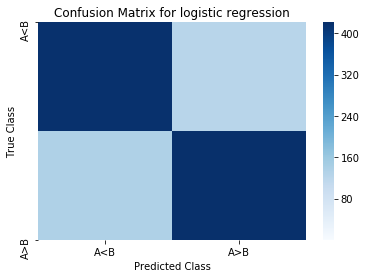

array([[419, 125],
       [135, 421]], dtype=int64)

In [50]:
LR = LogisticRegression().fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
acc_lr = metrics.accuracy_score(y_test, y_pred_lr)
c_lr=confusion_matrix(y_test, y_pred_lr)
print('Predict accuracy of Logistic Regression is ', acc_lr)
labels = ['A<B', 'A>B']
sns.heatmap(c_lr,xticklabels=labels, yticklabels=labels, fmt='d', cmap="Blues", vmin = 0.1);
plt.title('Confusion Matrix for logistic regression')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
c_lr

##### (2)Random Forest

Predict accuracy of Random Forest is  0.7909090909090909


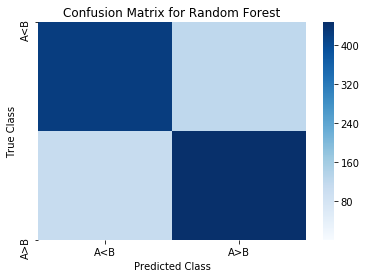

array([[423, 121],
       [109, 447]], dtype=int64)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = metrics.accuracy_score(y_test, y_pred_rf)
c_rf=confusion_matrix(y_test, y_pred_rf)
print('Predict accuracy of Random Forest is ', acc_rf)
labels = ['A<B', 'A>B']
sns.heatmap(c_rf,xticklabels=labels, yticklabels=labels, fmt='d', cmap="Blues", vmin = 0.1);
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
c_rf

In [53]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
diff_listed_count,0.210117
diff_follower_count,0.166544
diff_retweets_received,0.151146
diff_posts,0.088422
diff_mentions_sent,0.083693
diff_following_count,0.079989
diff_network_feature_2,0.079284
diff_network_feature_3,0.075396
diff_retweets_sent,0.065410


**From the random forest model, we got 79.09% predict accuracy in out-of sample data. Also, from the feature importance above, the three most important features are:**

1. diff_listed_count
2. diff_follower_count
3. diff_retweets_received

##### (3) XGboost

In [55]:
!pip install xgboost

Predict accuracy of Random Forest is  0.7945454545454546


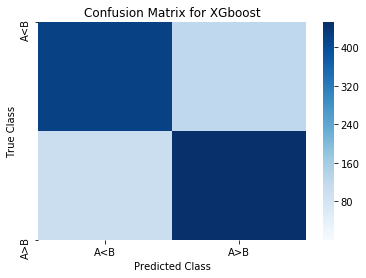

array([[422, 122],
       [104, 452]], dtype=int64)

In [57]:
import xgboost as xgb
xgb=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
c_xgb=confusion_matrix(y_test, y_pred_xgb)
print('Predict accuracy of Random Forest is ', acc_xgb)
labels = ['A<B', 'A>B']
sns.heatmap(c_xgb, xticklabels=labels, yticklabels=labels, fmt='d', cmap="Blues", vmin = 0.1);
plt.title('Confusion Matrix for XGboost')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()
c_xgb

#### Therefore, our best model is XGboost and the accuracy is 79.45%. The confusion matrix of XGboost model is above.

**From our random forest model, we decide that diff_listed_count, diff_follower_count, diff_retweets_received are three important predictors of influencers.**

**Diff_listed_count** is the most important variable which accounts for about 21%. Listed_count measures that the number of people that are in this users' list. A List is a curated group of Twitter accounts. The higher listed_count, the more people follow with interest.

**Diff_follower_count** is the second important variable which accounts for 16.6%. Follow_count is the number of followers this account currently has. So diff_follower_count shows how many more followers  A have than B. The more diff_follower_count, the more likely that A's influence power is higher than B's.

**Diff_retweets_received** is the third important variable which accouts for 15.1%. Retweets_received is the number of retweets this user received. The more retweets he/she received, the more people pay attention to the tweets he/she sent. So diff_retweets_received is another good predictor to measure the influencial difference between A and B.

If a business is doing a marketing promotion and can only allocate money to pay to one influencer, then this model would help them decide who is the better influencer, and thus the person to pay. Also, it is a great way for the business to make advertisement strategy. For example, when new product launched, the busienss needs to advertise new products on social media platform. It is a better way to use this predictive model to target right influencer to make advertising more effective.

### Calculate the financial value of your model

**Without analytics:**

Profit_1 = 10 * 0.01% * (A_followers_count + B_followers_count) - 5 * (# of A + # of B)

**With analytics:**

Profit_2 = 10 * 0.015% * prediction accuracy * Influencers_followers_count - 10 * # of Influencer

**Lift in net profit:**

Profit_2 - Profit_1

**Since without analytics, the retailer will let everyone (A+B) tweet once. so the profit_1 will be: (under assumption: Each user appears only once in the data)**

In [64]:
# When A is influencer, the choice is 1.
# A_influencer_follower calculates the followers of A if A is an influencer
A_influencer_follower = sum(df['A_follower_count'][df['Choice']==1])

# the same for B
B_influencer_follower = sum(df['B_follower_count'][df['Choice']==0])


In [74]:
profit_1 = 10*0.0001*(A_influencer_follower+B_influencer_follower) - 5*(len(df)+len(df))
print('Profit without analytics : ', round(profit_1,2) )

Profit without analytics :  5321568.59


**With analytics, the retailer will only target influencer and our model accuracy is 79.45%. Also, the retailer only target at A or B. The profit_2 will be:** 

In [73]:
profit_2 = 10*0.00015*0.7945*(A_influencer_follower+B_influencer_follower) - 10*(len(df))
print('Profit with analytics : ', round(profit_2,2) )

Profit with analytics :  6352525.62


In [72]:
lift_profit = profit_2 - profit_1
print('Lift in profit : ', round(lift_profit,2))

Lift in profit :  1030957.03


**If using a perfect analytic model which is the predict accuracy is 100%, the lift in net profit will be**

In [76]:
profit_perfect = 10*0.00015*(A_influencer_follower+B_influencer_follower) - 10*(len(df))
lift_profit_perfect = profit_perfect - profit_1
print('Lift in net profit from the perfect analytic model : ', round(lift_profit_perfect,2))

Lift in net profit from the perfect analytic model :  2688284.3
